In [242]:
#import packages
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud
from plotnine import *

## Data Visualization

In [145]:
#read in the csv files from data
top2019 = pd.read_csv("Popular_Playlist_2019.csv")
top2019=top2019.set_index("id")
top2020 = pd.read_csv("Popular_Playlist_2020.csv")
top2020=top2020.set_index("id")
top2021 = pd.read_csv("Popular_Playlist_2021.csv")
top2021=top2021.set_index("id")

In [146]:
#data munging: concatenation and dropping any duplicate entries
topSongs = pd.concat([top2019,top2020,top2021]).drop_duplicates()

In [147]:
#reset the index after the dropping of duplicates
topSongs = topSongs.reset_index()

In [6]:
#reformatting Dates
topSongs.release_date = pd.to_datetime(topSongs.release_date)
#scaling popularity 
topSongs["popularity_scaled"] = topSongs["popularity"]/100

In [123]:
#load in data
data = pd.read_csv("TikTok_Playlist.csv")
data

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,5reQI13tWWYDLMrGcUF4Mk,Nuestra Canción,"['Monsieur Periné', 'Vicente Garcia']",83,2015-06-16,0.906,0.731,6,-7.021,0,0.42600,0.000005,0.0853,0.794,106.995,260080,4
1,6M47gaKejso9772SKTa3yH,Face Off,"['Tech N9ne', 'Joey Cool', 'King Iso', 'Dwayne...",81,2021-10-08,0.693,0.935,8,-4.323,1,0.18000,0.000000,0.1790,0.391,80.882,219802,4
2,4IhTXiZLKATmwhMZIb1GQN,Lights Are On,['Tom Rosenthal'],78,2018-10-26,0.440,0.040,3,-16.887,1,0.98100,0.465000,0.1110,0.249,135.965,193749,4
3,15HMh4yxdf4wyxSZSlOgGZ,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,"['Amaarae', 'Kali Uchis', 'Moliy']",88,2021-09-16,0.859,0.525,1,-8.051,0,0.43400,0.000023,0.1080,0.312,110.066,204764,4
4,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,['Adele'],100,2021-10-14,0.604,0.366,5,-7.519,1,0.57800,0.000000,0.1330,0.130,141.981,224695,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0ecC8p17cDNlxHXkuYqeR6,Surrender,['Natalie Taylor'],76,2019-10-29,0.390,0.448,5,-8.570,0,0.80000,0.182000,0.1070,0.077,144.890,183103,5
201,6otiaV2fagE3s8IvP6WkwG,I'm Just a Kid,['Simple Plan'],73,2018-04-06,0.527,0.834,1,-5.531,1,0.00107,0.000102,0.0993,0.422,110.065,198333,4
202,6vFsBXYczYsP0H3lgunZOm,Cloud 9,['Beach Bunny'],80,2020-02-14,0.637,0.929,4,-3.593,1,0.00167,0.000026,0.3440,0.902,80.974,147351,4
203,11ZulcYY4lowvcQm4oe3VJ,Slumber Party (feat. Princess Nokia),"['Ashnikko', 'Princess Nokia']",79,2021-01-15,0.964,0.398,11,-8.981,0,0.00151,0.000039,0.1010,0.563,105.012,178405,4


In [124]:
# Reformatting Dates
data.release_date = pd.to_datetime(data.release_date)

In [122]:
#scaling popularity 
data["popularity_scaled"] = data["popularity"]/100

In [17]:
#view overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 205 non-null    object        
 1   title              205 non-null    object        
 2   all_artists        205 non-null    object        
 3   popularity         205 non-null    int64         
 4   release_date       205 non-null    datetime64[ns]
 5   danceability       205 non-null    float64       
 6   energy             205 non-null    float64       
 7   key                205 non-null    int64         
 8   loudness           205 non-null    float64       
 9   mode               205 non-null    int64         
 10  acousticness       205 non-null    float64       
 11  instrumentalness   205 non-null    float64       
 12  liveness           205 non-null    float64       
 13  valence            205 non-null    float64       
 14  tempo     

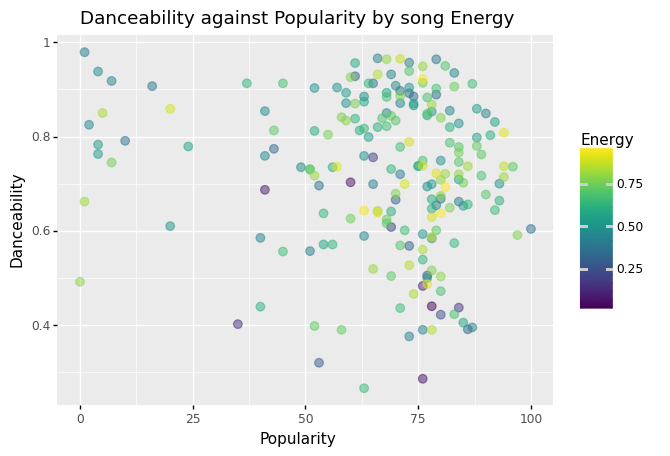

In [57]:
# Plot 2: Danceability against Popularity by song Energy
'''
Plot danceability against popularity by color energy,
we can see that high energy tracks are both danceable and more popular. 
Generally high popularity of songs indicates high value of danceability on Tiktok
'''
plot2 = p9.ggplot(data, p9.aes(x='popularity', y = "danceability", color = "energy") )
plot2 += p9.geom_count(alpha = 0.5, size = 3)
plot2 += p9.ggtitle('Danceability against Popularity by song Energy')
plot2 += p9.labels.ylab("Danceability")
plot2 += p9.labels.xlab("Popularity")
plot2 += p9.labs(color='Energy') 
plot2.draw();

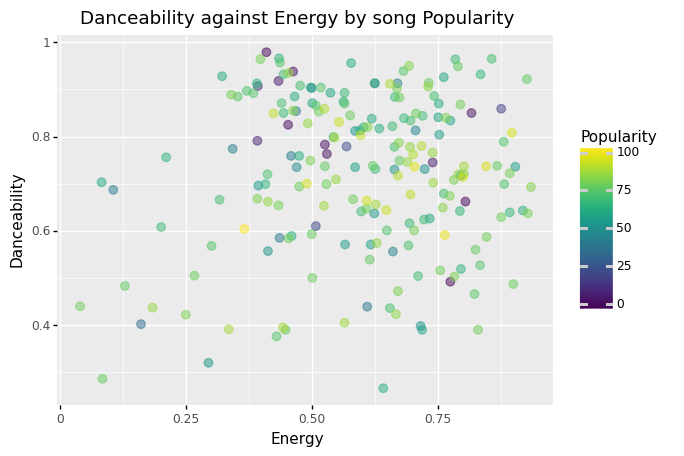

In [58]:
# Plot 3: Danceability against Popularity by song Energy
'''
Plot danceability against energy by color popularity,
There is no clear correlation between the variables.
'''
plot3 = p9.ggplot(data, p9.aes(x='energy', y = "danceability", color = "popularity") )
plot3 += p9.geom_count(alpha = 0.5, size = 3)
plot3 += p9.ggtitle('Danceability against Energy by song Popularity')
plot3 += p9.labels.ylab("Danceability")
plot3 += p9.labels.xlab("Energy")
plot3 += p9.labs(color='Popularity') 
plot3.draw();

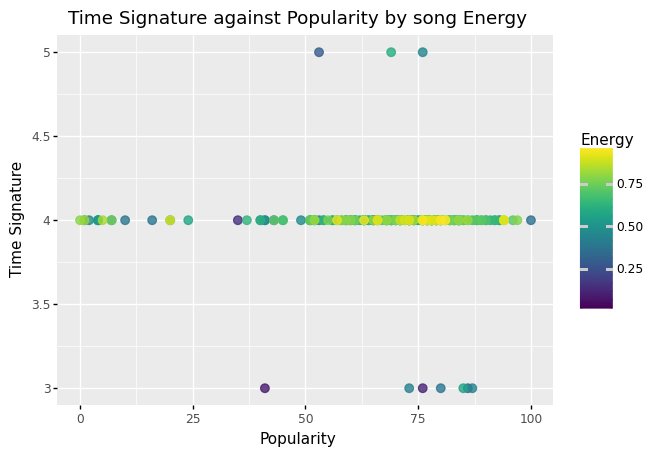

In [59]:
# Plot 4: Time signature against Popularity by song Energy
'''
Plot time signature against popularity by color energy,
we can see that high energy tracks are likely to have 4 beats in each bar and more popular,
and low energy tracks are only popular when they have 3 beats per bar or 5 beats per bar.
Generally high popularity of songs indicates 4 beats per bar with high energy on Tiktok.
'''
plot4 = p9.ggplot(data, p9.aes(x='popularity', y = "time_signature", color = "energy") )
plot4 += p9.geom_count(alpha = 0.8, size=3)
plot4 += p9.ggtitle('Time Signature against Popularity by song Energy')
plot4 += p9.labels.ylab("Time Signature")
plot4 += p9.labels.xlab("Popularity")
plot4 += p9.labs(color='Energy') 
plot4.draw();

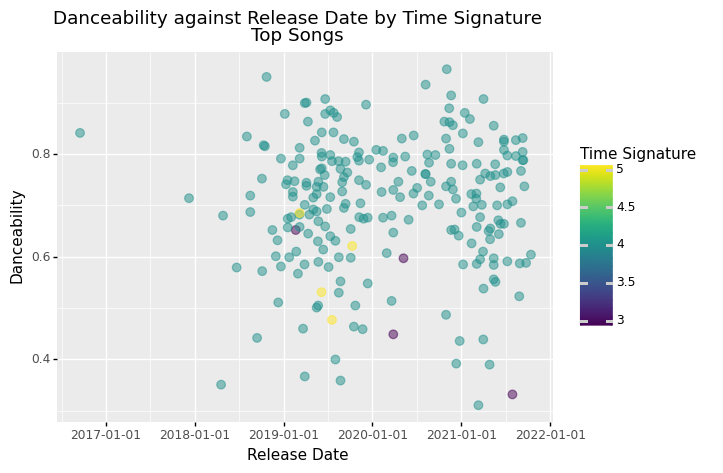

In [61]:
# Plot 6: Danceability against Release date by color Time Signature for Top Songs
'''
Plot danceability against release date by color time signature for top songs,
these playlists are for the three years 2019, 2020, 2021. Most songs are released within a year of their 
inclusion on the list of top songs for the year, but there are notable outliers such as the song released in 2016.
The danceability value is on the higher end of the scale for most of the top songs, between 0.6 and 0.8.

Again it is visible that most data points is 4 beats per bar, but less danceable songs have 3/5 beats per bar.
'''
plot6 = p9.ggplot(topSongs, p9.aes(x='release_date', y = "danceability", color = "time_signature") )
plot6 += p9.geom_count(alpha = 0.5, size = 3)
plot6 += p9.ggtitle('Danceability against Release Date by Time Signature\nTop Songs')
plot6 += p9.labels.ylab("Danceability")
plot6 += p9.labels.xlab("Release Date")
plot6 += p9.labs(color='Time Signature') 
plot6.draw();

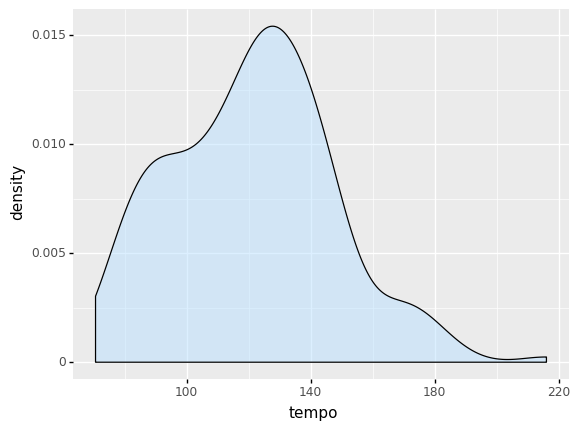

In [42]:
gg = p9.ggplot(data, p9.aes(x='tempo'))
gg += p9.geom_density(fill = "#bae1ff", alpha = 0.5)
#plot and remove address printing
gg.draw();

In [44]:
import seaborn as sns
import matplotlib

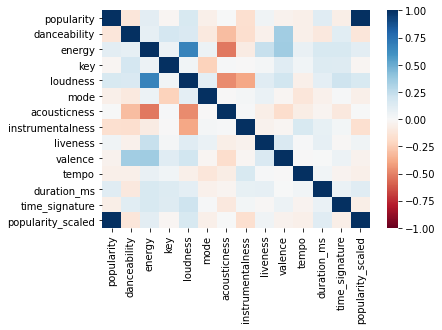

In [50]:
ryb = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])
corr = data.corr()
corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)
_ = sns.heatmap(data.corr(), vmin = -1, vmax = 1, cmap = 'RdBu')

In [45]:
data.corr()['popularity']

popularity           1.000000
danceability        -0.121491
energy               0.108312
key                 -0.017194
loudness             0.159674
mode                -0.055381
acousticness         0.002463
instrumentalness    -0.163533
liveness             0.041305
valence             -0.041070
tempo               -0.058760
duration_ms          0.117908
time_signature      -0.065551
popularity_scaled    1.000000
Name: popularity, dtype: float64

In [49]:
(abs(data.corr()['popularity']).sort_values()

acousticness         0.002463
key                  0.017194
valence              0.041070
liveness             0.041305
mode                 0.055381
tempo                0.058760
time_signature       0.065551
energy               0.108312
duration_ms          0.117908
danceability         0.121491
loudness             0.159674
instrumentalness     0.163533
popularity_scaled    1.000000
popularity           1.000000
Name: popularity, dtype: float64